In [1]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

import sys
print(sys.executable)

Setup complete. Using torch 1.7.1+cu110 _CudaDeviceProperties(name='GeForce GTX 1650', major=7, minor=5, total_memory=4096MB, multi_processor_count=16)
d:\workspaces\quadrepprojects\14pedal-picking\3rdparty\14yolov5\.env\scripts\python.exe


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov5x.pt'])
Fusing layers... 
image 1/2 d:\WORKSPACES\QuadrepProjects\14pedal-picking\3rdparty\14yolov5\data\images\bus.jpg: 640x480 Done. (0.403s)
image 2/2 d:\WORKSPACES\QuadrepProjects\14pedal-picking\3rdparty\14yolov5\data\images\zidane.jpg: 384x640 Done. (0.320s)
Results saved to runs\detect\exp3
Done. (0.984s)
YOLOv5 v4.0-84-g744ccc7 torch 1.7.1+cu110 CUDA:0 (GeForce GTX 1650, 4096.0MB)

Model Summary: 476 layers, 87730285 parameters, 0 gradients, 218.8 GFLOPS


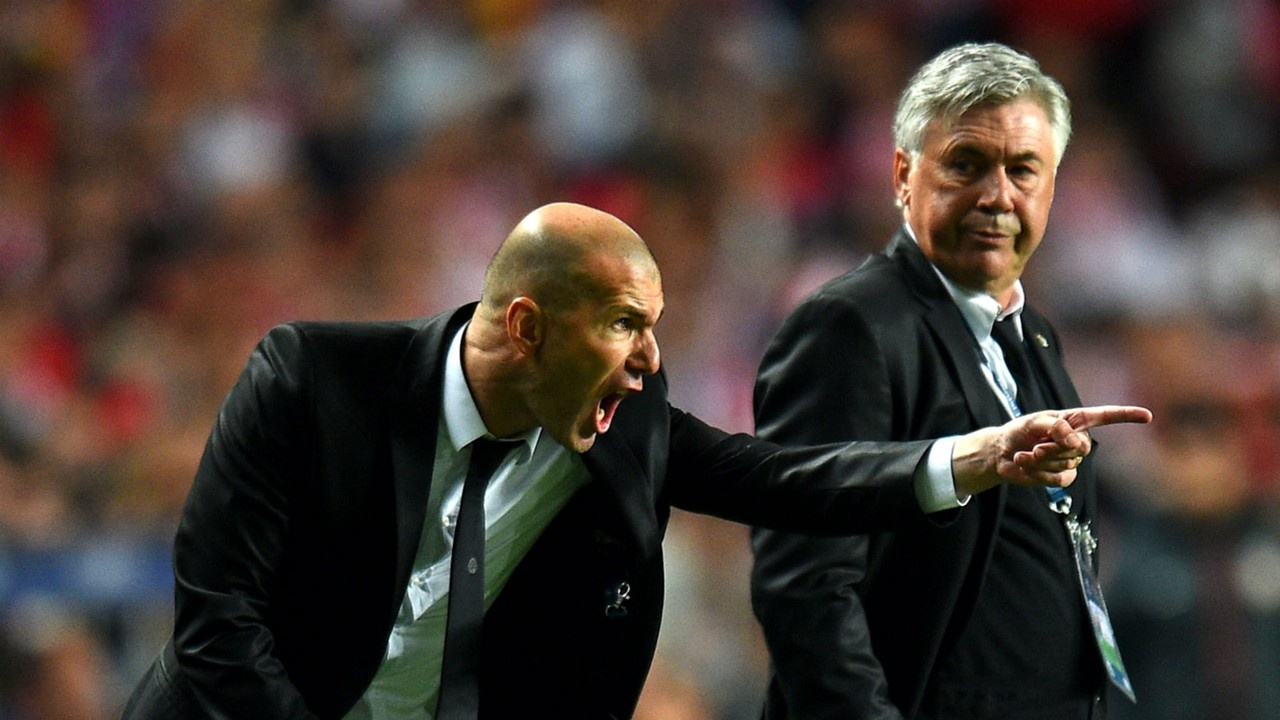

In [2]:
!python detect.py --weights yolov5x.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/zidane.jpg', width=600)

In [2]:
# Tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

Reusing TensorBoard on port 6006 (pid 19844), started 5 days, 17:36:33 ago. (Use '!kill 19844' to kill it.)

In [3]:
# Weights & Biases (optional)
!wandb login

wandb: Currently logged in as: akiragishinichi (use `wandb login --relogin` to force relogin)


In [4]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 4 --epochs 3 --workers 1 --data coco128.yaml --weights yolov5s.pt --nosave --cache

github: up to date with https://gitlab.com/akiragishinichi/yolov5 




YOLOv5 v4.0-84-g744ccc7 torch 1.7.1+cu110 CUDA:0 (GeForce GTX 1650, 4096.0MB)

Namespace(adam=False, batch_size=4, bucket='', cache_images=True, cfg='', data='.\\data\\coco128.yaml', device='', epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs\\train\\exp2', single_cls=False, sync_bn=False, total_batch_size=4, weights='yolov5s.pt', workers=1, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.

In [5]:
Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename='runs/train/exp/test_batch0_labels.jpg', width=800)  # test batch 0 labels
Image(filename='runs/train/exp/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

FileNotFoundError: [Errno 2] No such file or directory: 'runs/train/exp/train_batch0.jpg'

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp')  # plot all results*.txt as results.png
Image(filename='runs/train/exp/results.png', width=800)